## Digits competition

### Imports

In [3]:
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

In [4]:
sns.set(style='white', context='notebook', palette='deep')

seed=42

### Data loading

In [5]:
sample_submission = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train
28x28
764pixel = features

In [11]:
train_, valid = train_test_split(train, test_size=0.15, random_state=seed, shuffle=True) 

In [14]:
# To do this cell one time.
train_.to_csv('val/train.csv', header=False)
valid.to_csv('val/valid.csv', header=False)

In [10]:
target = train['label']
train.drop('label', axis=1, inplace=True)

/home/magleb/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

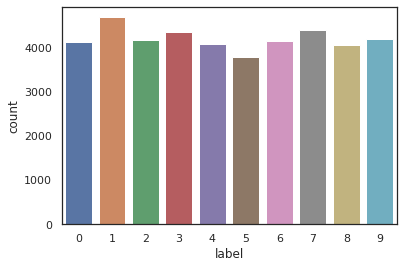

In [120]:
sns.countplot(target)

In [122]:
target.value_counts().describe()

count      10.000000
mean     4200.000000
std       237.089294
min      3795.000000
25%      4087.000000
50%      4157.000000
75%      4310.250000
max      4684.000000
Name: label, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [67]:
features_train, features_deferred, target_train, target_deferred = train_test_split(train, target,
                                                                              test_size=0.2, shuffle=True,
                                                                              random_state=seed)


In [28]:
from keras import layers


In [36]:
input_shape = [features_train.shape[1]]
UNITS = 1024

In [91]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(UNITS, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(UNITS, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])



In [ ]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.ConV2d()
    layers.ConV2d()
    layers.maxPolling()
])

In [68]:
prediction = model(np.array(features_train[:1])).numpy()
prediction

array([[8.2903858e-07, 8.2966847e-29, 0.0000000e+00, 1.2986040e-32,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.5513723e-21,
        9.9999917e-01, 0.0000000e+00]], dtype=float32)

In [69]:
tf.nn.softmax(prediction)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08533683, 0.08533676, 0.08533676, 0.08533676, 0.08533676,
        0.08533676, 0.08533676, 0.08533676, 0.23196916, 0.08533676]],
      dtype=float32)>

In [80]:
tf.nn.sigmoid(prediction)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.5000002, 0.5      , 0.5      , 0.5      , 0.5      , 0.5      ,
        0.5      , 0.5      , 0.7310584, 0.5      ]], dtype=float32)>

In [70]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [72]:
loss_fn(target[:1], prediction).numpy()

2.4611502

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [92]:
model.compile(
    optimizer = 'adam',
    loss = loss_fn,
    metrics = ['accuracy']
)

Epoch 1/30
132/132 - 4s - loss: 0.3022 - accuracy: 0.9137 - val_loss: 0.1798 - val_accuracy: 0.9504
Epoch 2/30
132/132 - 3s - loss: 0.1110 - accuracy: 0.9648 - val_loss: 0.1489 - val_accuracy: 0.9632
Epoch 3/30
132/132 - 3s - loss: 0.0652 - accuracy: 0.9792 - val_loss: 0.1693 - val_accuracy: 0.9649
Epoch 4/30
132/132 - 3s - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.1702 - val_accuracy: 0.9626
Epoch 5/30
132/132 - 3s - loss: 0.0367 - accuracy: 0.9876 - val_loss: 0.1786 - val_accuracy: 0.9686
Epoch 6/30
132/132 - 3s - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.1906 - val_accuracy: 0.9708
Epoch 7/30
132/132 - 3s - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.1765 - val_accuracy: 0.9708
Minimum validation loss: 0.14891235530376434


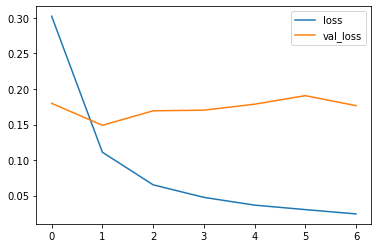

In [93]:
history = model.fit(
    features_train, target_train,
    validation_data=(features_deferred, target_deferred),
    batch_size=256,
    epochs=30,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=2,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [95]:
probability_model = keras.Sequential([
    model,
    layers.Softmax()
])

In [96]:
probability_model(np.array(test))

<tf.Tensor: shape=(28000, 10), dtype=float32, numpy=
array([[0.08533679, 0.08533679, 0.23196855, ..., 0.08533679, 0.08533679,
        0.08533679],
       [0.23196931, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08543111, 0.08545013, 0.08543006, ..., 0.08564617, 0.08548222,
        0.2305718 ],
       ...,
       [0.08533674, 0.08533675, 0.08533675, ..., 0.08533674, 0.08533677,
        0.08533676],
       [0.08534736, 0.08534703, 0.08534702, ..., 0.085366  , 0.0853472 ,
        0.23180696],
       [0.08533915, 0.08533915, 0.23193122, ..., 0.08533915, 0.08533916,
        0.08533915]], dtype=float32)>

In [99]:
prediction = list(map(np.argmax, probability_model(np.array(test))))

In [112]:
data = {'ImageId': np.arange(len(prediction)) + 1, 'Label': prediction}
submission = pd.DataFrame(columns=['ImageId', 'Label'], data=data)

In [118]:
submission.to_csv('first_sub.csv', index=False)

## Neural network. VGG architection